In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import plotly.offline as py
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
import itertools
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import (metrics, linear_model, preprocessing)

import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
print ('default',os.getcwd())

pd.set_option('display.max_rows', 200)

pd.options.mode.chained_assignment = None

default /Users/flatironschool/Desktop/iNueron/Insurance_Fraud_Prediction


In [5]:
path = 'data/insuranceFraud.csv'  # note i kept the csv file in dataset file so its easy to call from there
df=pd.read_csv(path, na_values='NA' , skiprows=0)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [6]:
print('Insurance Data - rows:' , df.shape[0],'columns:', df.shape[1])

Insurance Data - rows: 1000 columns: 39


# Checking % of missing values in the DataFrame

In [7]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,fraud_reported,insured_zip,capital-loss,capital-gains,insured_relationship,insured_hobbies,insured_occupation,insured_education_level,insured_sex,umbrella_limit,...,bodily_injuries,incident_severity,property_damage,number_of_vehicles_involved,incident_hour_of_the_day,incident_location,incident_city,incident_state,authorities_contacted,months_as_customer
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# From the above data seems to have no missing values. So i am confirming in the line below

In [8]:
print("There is {} missing values in the dataframe".format(df.isnull().sum().sum()))

There is 0 missing values in the dataframe


In [ ]:
# checking data type of each column in the DF

In [9]:
pd.DataFrame([df.dtypes] ,index=['df'] ).T

,df
months_as_customer,int64
age,int64
policy_number,int64
policy_bind_date,object
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64


In [ ]:
# Checking our target column

In [17]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [56]:
df_new = df[:]

In [57]:
df_new['fraud_reported'] = df_new['fraud_reported'].map(lambda x : 1 if x == 'Y' else 0)

In [58]:
df_new['fraud_reported'].unique()

array([1, 0])

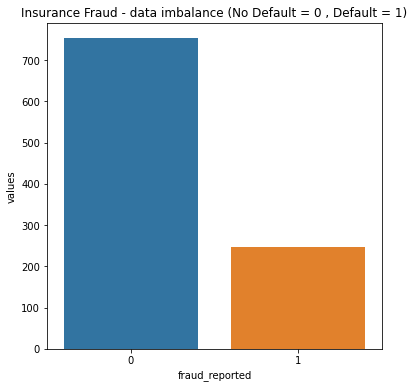

In [59]:
temp = df_new['fraud_reported'].value_counts()
df_new = pd.DataFrame({'fraud_reported' : temp.index , 'values' : temp.values})
plt.figure(figsize = (6,6))
plt.title("Insurance Fraud - data imbalance (No Default = 0 , Default = 1)")
sns.set_color_codes("pastel")
sns.barplot(x = 'fraud_reported' , y = 'values' , data = df_new)
locs , labels = plt.xticks()
plt.show()

# What percentage of the data is fraud reported or not?

In [60]:
#labels
lab = df["fraud_reported"].value_counts().keys().tolist()
#values
val = df["fraud_reported"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Target distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [ ]:
# Converting the target column in the main dataframe to numbers 

In [64]:
d = {'N' : 0, 'Y' : 1}
df['fraud_reported'] = df['fraud_reported'].map(d)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [ ]:
# further analysis

In [66]:
# Determine number of fraud cases in dataset

Fraud = df[df['fraud_reported'] == 1]
Valid = df[df['fraud_reported'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(df[df['fraud_reported'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['fraud_reported'] == 0])))

0.3280212483399734
Fraud Cases: 247
Valid Transactions: 753


# Observation : 
- Data is imbalanced .Thus 75% of the time fraud was not flagged. Fraud was flagged only 25%.
- Out of 753 valid transactions , 247 fraud cases were reported.
- Hence I will have to deal later with the imbalace in the data

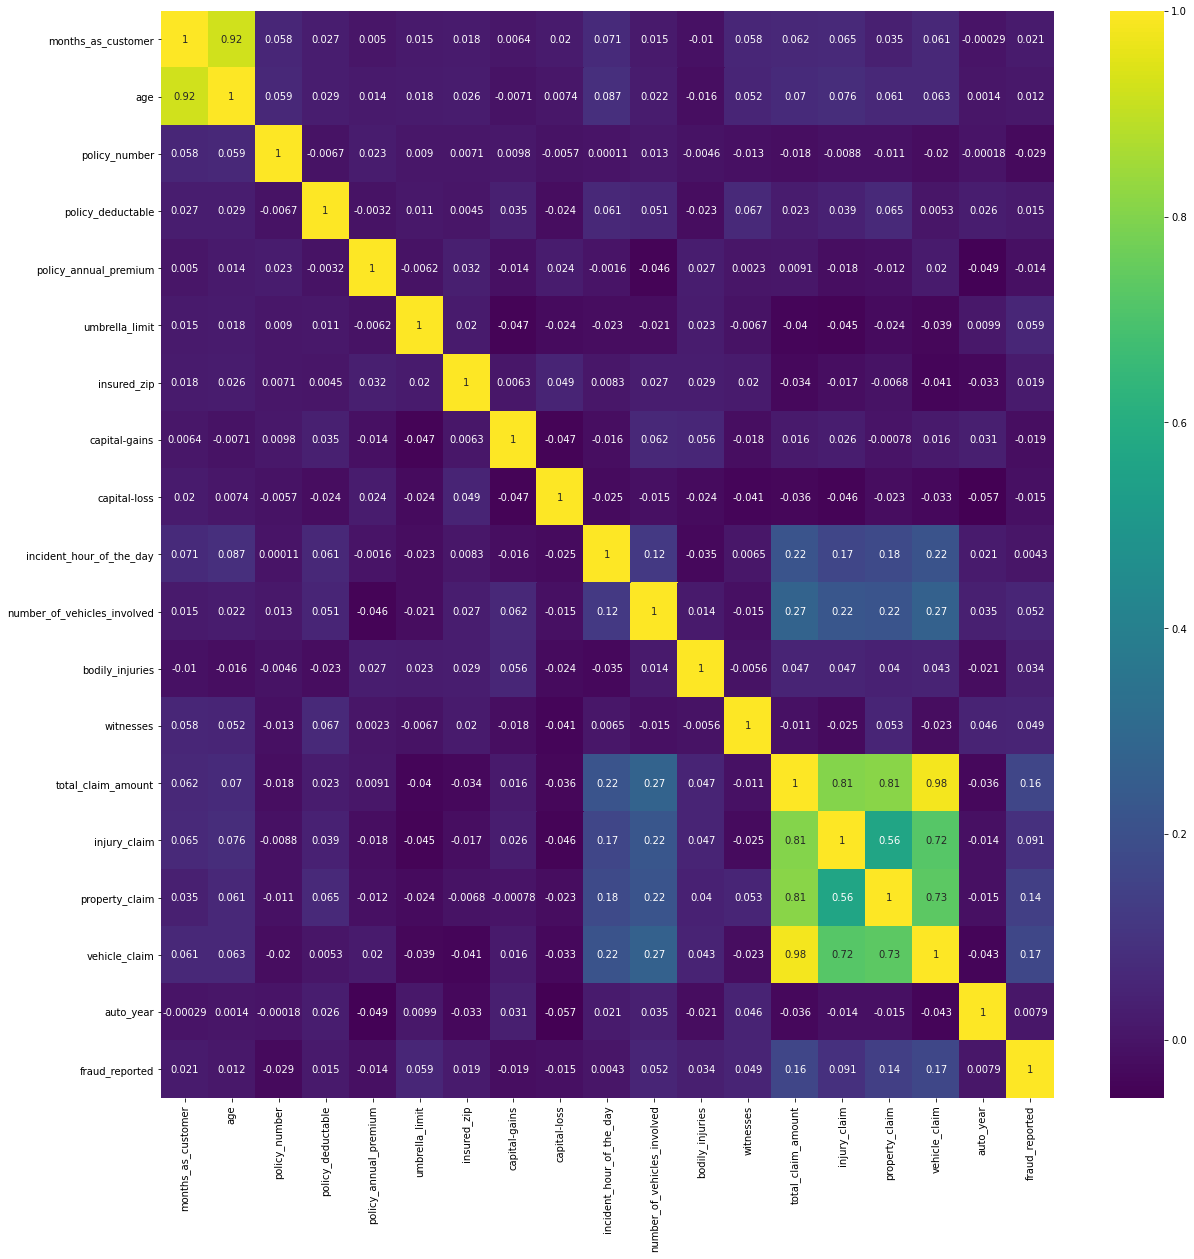

In [68]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='viridis')

In [69]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [ ]:
# Removing Placeholders in the df.  note data has some placeholders "?" . 

In [73]:
df.replace(" ?" , np.nan).dropna()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


In [78]:
# In the app i will create a simple function for this
df = df.replace("?" , np.nan).dropna()

In [80]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
5,256,39,104594,10/12/2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,1
8,27,33,485665,2/5/1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,0
11,447,61,214618,5/29/1999,OH,100/300,2000,1137.16,0,615561,...,2,YES,114920,17680,17680,79560,Audi,A3,2006,0


# EDA basic visualizations

In [ ]:
# Age distribution in the dataframe

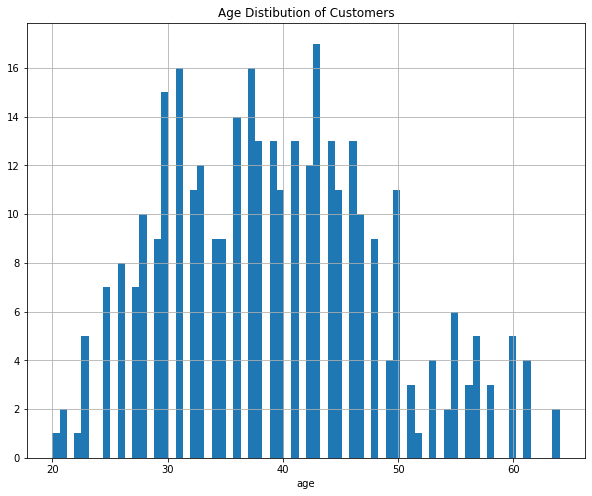

In [83]:
plt.figure(figsize=(10,8))
df['age'].hist(bins=70)
plt.title("Age Distibution of Customers")
plt.xlabel("age")
plt.show()

# Age vs Target

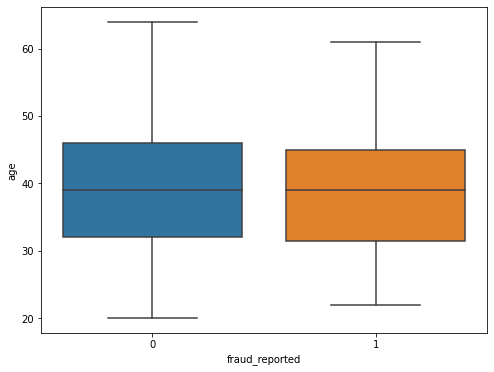

In [98]:
plt.figure(figsize = (8,6))
sns.boxplot(x='fraud_reported' , y = 'age' , data = df)
plt.show()

In [84]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

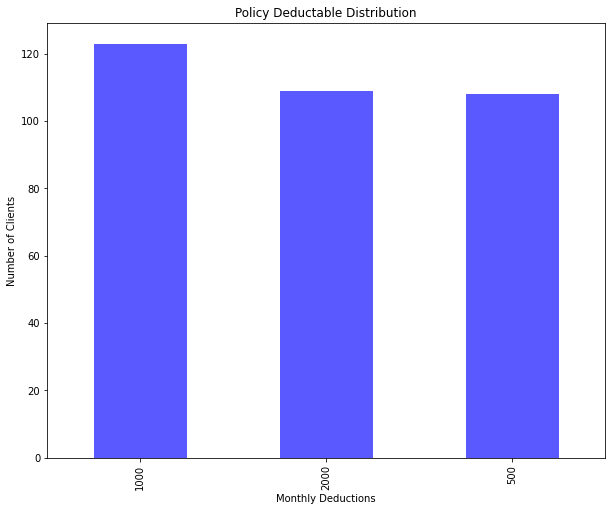

In [91]:
plt.figure(figsize=(10,8))
df['policy_deductable'].value_counts().plot(kind='bar', color='blue',alpha=.65)
plt.title("Policy Deductable Distribution")
plt.xlabel("Monthly Deductions")
plt.ylabel("Number of Clients")
plt.show()

# Fraud Report by State

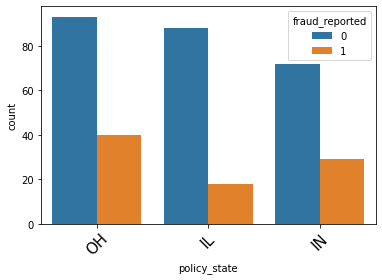

In [92]:
s = sns.countplot("policy_state" , data= df , hue = 'fraud_reported')
s.set_xticklabels(s.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

In [ ]:
# Note - More visualizations can be created with all the various columns in the dataframe

In [ ]:
# Feature Engineering 

In [ ]:
# Get categorical columns

In [93]:
def get_cat(df):
    """get list of cat features from df"""
    cat = []
    for x in df.columns:
        if df[x].dtypes == 'object':
            cat.append(x)
    return cat

cat1 = get_cat(df)

In [94]:
cat1

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [ ]:
# Get numerical columns

In [95]:
def get_nom(df):
    """get nom features"""
    nom = []
    for x in df.columns:
        if df[x].dtypes != 'object':
            nom.append(x)
    return nom[2:] # no need for feature id and age but customise according to df

nom1 = get_nom(df)

In [96]:
nom1

['policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'fraud_reported']

# Dealing with missing values in categorical columns

+ As we have some missing values in our categorical columns , I decided to use the categorical 
  imputer to deal with missing values in the columns

In [101]:
cat1

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 992
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           340 non-null    int64  
 1   age                          340 non-null    int64  
 2   policy_number                340 non-null    int64  
 3   policy_bind_date             340 non-null    object 
 4   policy_state                 340 non-null    object 
 5   policy_csl                   340 non-null    object 
 6   policy_deductable            340 non-null    int64  
 7   policy_annual_premium        340 non-null    float64
 8   umbrella_limit               340 non-null    int64  
 9   insured_zip                  340 non-null    int64  
 10  insured_sex                  340 non-null    object 
 11  insured_education_level      340 non-null    object 
 12  insured_occupation           340 non-null    object 
 13  insured_hobbies     